### Import the dataset & libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset
df = pd.read_csv("scrap.csv")

In [ ]:
df.columns = ['Text']

### Dealing with missing values

In [ ]:
df.isna().sum()

Text    0
dtype: int64

In [ ]:
df

,Text
0,\nWhether you can’t get motivated to clean you...
1,\nSome people just seem to have a knack for ma...
2,"\nEmotional intelligence, sometimes referred t..."
3,\nIndividuals with social intelligence can sen...
4,\nExpertise is what separates the amateur from...
...,...
311,\nAnti-racism is a process of actively identif...
312,\nAs the nation wrestles with institutional ra...
313,"\nIn a large-scale, multi-country study lookin..."
314,\nThe Women's Preventive Services Initiative (...


### Labeling the dataset

### Data cleaning & text preprocessing

In [ ]:
# removing urls
import re
def clean_url(row):
    return re.sub(r'http\s+', '',row)

df['cleaned_text'] = df['Text'].apply(clean_url)

In [ ]:
#Removing all irrelevant characters
def remove_non_alphanum(row):
    return re.sub('[^a-zA-Z]',' ',row)
df['cleaned_text'] = df['cleaned_text'].apply(remove_non_alphanum)

In [ ]:
#convert all caracters into lowercase
def clean_lowercase(row):
    return str(row).lower()
df['cleaned_text'] = df['cleaned_text'].apply(clean_lowercase)

In [ ]:
#tokenazation
import nltk
from nltk.tokenize import word_tokenize

def tokenize(row):
    return word_tokenize(row)

df['cleaned_text'] = df['cleaned_text'].apply(tokenize)   

In [ ]:
df.head()

,Text,cleaned_text
0,\nWhether you can’t get motivated to clean you...,"[whether, you, can, t, get, motivated, to, cle..."
1,\nSome people just seem to have a knack for ma...,"[some, people, just, seem, to, have, a, knack,..."
2,"\nEmotional intelligence, sometimes referred t...","[emotional, intelligence, sometimes, referred,..."
3,\nIndividuals with social intelligence can sen...,"[individuals, with, social, intelligence, can,..."
4,\nExpertise is what separates the amateur from...,"[expertise, is, what, separates, the, amateur,..."


In [ ]:
#removing stopwords
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

def clean_stopwords(token):
    return [item for item in token if item not in stop_words]

df['cleaned_text'] = df['cleaned_text'].apply(clean_stopwords) 

In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
def clean_limmmat(token):
    return [lemma.lemmatize(word=w, pos='v') for w in token]

df['cleaned_text'] = df['cleaned_text'].apply(clean_limmmat)

In [ ]:
#removing words having length <=2
def clear_length(token):
    return [i for i in token if len(i) > 2]
df['cleaned_text'] = df['cleaned_text'].apply(clear_length)

In [ ]:
#Convert the list of tokens into back to the string
def convet_to_text(list):
    return ' '.join(list)
df['cleaned_text'] = df['cleaned_text'].apply(convet_to_text)

### Text Visualization

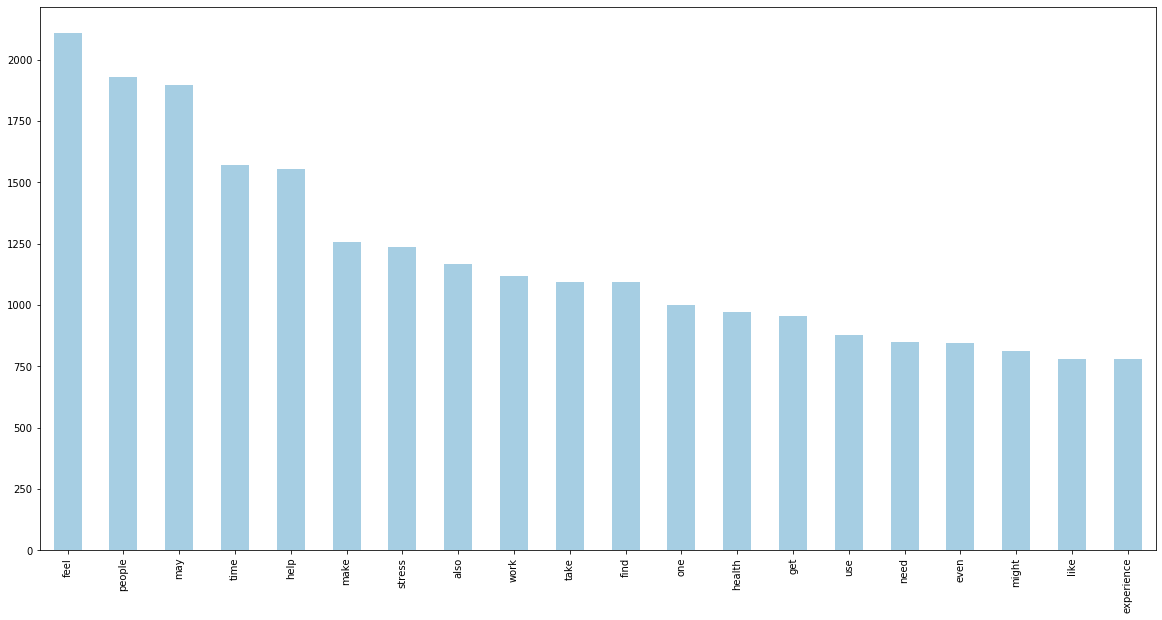

In [ ]:
color = 'Paired'
plt.figure(figsize = (20,10))
pd.Series(' '.join([i for i in df.cleaned_text]).split()).value_counts().head(20).plot(kind= 'bar', colormap = color)
plt.show()

In [ ]:
df.to_csv("cleandata.csv",index=False)